In [158]:
import sys
sys.path.append('/home/moetjens/kidd-lab/jmkidd-projects/scripts/nextgen')
sys.path.append('/home/moetjens/kidd-lab/jmkidd-projects/scripts/pythonUtils')
import genutils
from optparse import OptionParser
import fastqstats
from collections import defaultdict
import re

In [159]:
#arguements for inputs, outputs, and sample name

USAGE = """
Program on the command line here
"""

parser = OptionParser()
parser.add_option('--r1fq',dest='r1fq', help = 'name of f1 fq.gz')
parser.add_option('--r2fq',dest='r2fq', help = 'name of f2 fq.gz')
parser.add_option('--sample',dest='sampleName', help = 'name of sample')

#(options, args) = parser.parse_args()

#if options.r1fq is None:
#    parser.error('r1fq name not given')

#if options.r2fq is None:
#    parser.error('r2fq not given')

#if options.sampleName is None:
#    parser.error('sampleName not given')

r1fqFile= "/home/moetjens/kidd-lab-scratch/moetjens-projects/bsmn/MIPs/Run_2015-03-06/Trp53MIP_S19_L001_R1_001.fastq.gz"
r2fqFile= "/home/moetjens/kidd-lab-scratch/moetjens-projects/bsmn/MIPs/Run_2015-03-06/Trp53MIP_S19_L001_R2_001.fastq.gz"




In [200]:
#set up myData dictionary
# setup file location info
myData = {}
#myData['r1fq'] = options.r1fq
#myData['r2fq'] = options.r2fq
#myData['sampleName'] = options.sampleName
myData['r1fq'] = r1fqFile
myData['r2fq'] = r2fqFile
myData['sampleName'] = "Trp53"
barcode_dict = defaultdict(int)

In [201]:
#iterate through the fastq files

def fastq_iterator(myData):
    #count =0
    fqfileR1 = genutils.open_gzip_read(myData['r1fq'])
    fqfileR2 = genutils.open_gzip_read(myData['r2fq'])
    while True: 
        #count+=1
        R1 = fastqstats.get_next_seq_record(fqfileR1)
        R2 = fastqstats.get_next_seq_record(fqfileR2)
        if R1 is None: break 
        if R2 is None: break
        yield (R1['seq'], R2['seq'])
        #if(count>1000): break


readCount = 0
dropOut = 0
for read1Seq, read2Seq in fastq_iterator(myData):
    readCount +=1
    tag = read2Seq[:11]
    if tag.count('N') > 0 or re.search('A{5,}', tag) or re.search('G{5,}', tag) or re.search('C{5,}', tag) or re.search('T{5,}', tag):
            dropOut += 1
            continue #drop sequence with any Ns or with strings of homopolymers > 4nt 
    if(tag not in barcode_dict):
        barcode_dict.update({tag:int(1)})
    else:
        barcode_dict[tag] += int(1)

print("%s %s" % ("total number of read pairs is",str(readCount)))
print("%s %s" % ("total number of dropped pairs is ",str(dropOut)))

total number of read pairs is 2356117
total number of dropped pairs is  81237


In [204]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import scipy.misc

In [205]:
barcodeCounts= pd.DataFrame({'counts': barcode_dict.values()})
print barcodeCounts['counts'].describe()


#barcodeCounts.plot(kind='hist', stacked=True, bins=20)


#file = open('/home/moetjens/kidd-lab-scratch/moetjens-projects/bsmn/MIPs/Run_2015-03-06/barcodeCounts.txt','w')

#for key, value in barcode_dict.iteritems():
    #file.write("%s\t%s\n" % (key,value))

#file.close()


#histogram w/ Pandas
#myTicksX = range(0, 1200, 100)
#myLimX = [0,800] 
#len(barcodeCounts)
#barcodeCounts[1:100]
#merged.plot(kind='hist', stacked=True, bins=20)

count    1358709.000000
mean           1.674295
std           89.099630
min            1.000000
25%            1.000000
50%            1.000000
75%            2.000000
max       102716.000000
dtype: float64


In [206]:
SeqList=defaultdict(list)
SeqList['1 copy']=[]
SeqList['2 copies']=[]
SeqList['3 copies']=[]
SeqList['4 copies']=[]
SeqList['5-10 copies']=[]
SeqList['a11-100 copies']=[]
SeqList['b101-1000 copies']=[]
SeqList['c1000+']=[]

#d[k].append(v)

for tagSeq, tagCount in barcode_dict.iteritems(): 
    if tagCount == 1 :
        SeqList['1 copy'].append(tagSeq)
    if tagCount == 2 :
        SeqList['2 copies'].append(tagSeq)
    if tagCount == 3 :
        SeqList['3 copies'].append(tagSeq)
    if tagCount == 4 :
        SeqList['4 copies'].append(tagSeq)
    if tagCount in range(5,11):
        SeqList['5-10 copies'].append(tagSeq)
    if tagCount in range(11,101):
        SeqList['a11-100 copies'].append(tagSeq)
    if tagCount in range(101,1001):
        SeqList['b101-1000 copies'].append(tagSeq)
    if tagCount > 1000:
        SeqList['c1000+'].append(tagSeq)

1 copy 926906
2 copies 281653
3 copies 88999
4 copies 31622
5-10 copies 26328
a11-100 copies 3055
b101-1000 copies 135
c1000+ 11


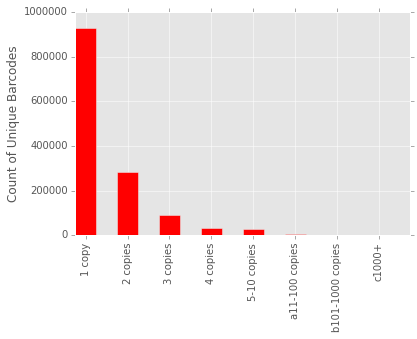

In [207]:
tagCount=[]
tagName=[]
for tagSet in sorted(SeqList.keys()):
    print("%s %s" % (tagSet,len(SeqList[tagSet])))
    tagCount.append(len(SeqList[tagSet]))
    tagName.append(tagSet)
    
N = 8
counts = tagCount
names = tagName
width=0.50
ind = np.arange(N)  # the x locations for the groups
fig, ax = plt.subplots()
ax.bar(ind, counts, width, color='r')
ax.set_xticklabels( (tagName), rotation='vertical'  )
plt.xticks(ind+width/2., names)
plt.ylabel('Count of Unique Barcodes')

1 copy 0.393404062701
2 copies 0.119541177284
3 copies 0.0377735910398
4 copies 0.0134212350236
5-10 copies 0.011174317744
a11-100 copies 0.00129662491294
b101-1000 copies 5.72976639106e-05
c1000+ 4.66869854086e-06


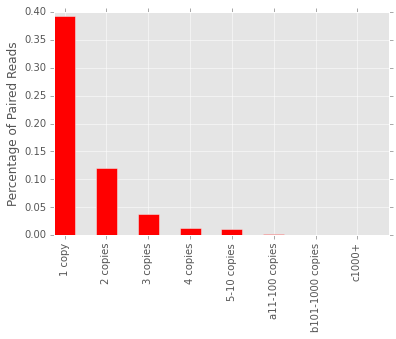

In [208]:
from __future__ import division

tagCount=[]
tagName=[]
for tagSet in sorted(SeqList.keys()):
    print("%s %s" % (tagSet,float(len(SeqList[tagSet])/readCount)))
    tagCount.append(len(SeqList[tagSet])/readCount)
    tagName.append(tagSet)
    
N = 8
counts = tagCount
names = tagName
width=0.50
ind = np.arange(N)  # the x locations for the groups
fig, ax = plt.subplots()
ax.bar(ind, counts, width, color='r')
ax.set_xticklabels( (tagName), rotation='vertical'  )
plt.xticks(ind+width/2., names)
plt.ylabel('Percentage of Paired Reads')



In [194]:
import re
match = re.search('A{5,}', 'TAAAACTG')
if match:
    print "matches"